# Isometric transformations

In the world of vector (or matrix) calculus, we speak of orthogonal automophism rather than of isometric transformation as we
will see it at the end.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=3, linewidth=150, suppress=True)
plt.style.use(['seaborn-whitegrid','data/cours.mplstyle'])

In [2]:
angle = np.array([θ for θ in np.linspace(-np.pi/2,np.pi/2,7)])
shape1 = np.concatenate([np.array([np.cos(angle), np.sin(angle)]), \
                         np.array([[-0.5, -1, -1, -1], [1, 1, 0.5, 0]]), \
                         np.array([[-0.5, 0], [-0.5, -1]])], axis=1)
print(shape1)

[[ 0.     0.5    0.866  1.     0.866  0.5    0.    -0.5   -1.    -1.    -1.    -0.5    0.   ]
 [-1.    -0.866 -0.5    0.     0.5    0.866  1.     1.     1.     0.5    0.    -0.5   -1.   ]]


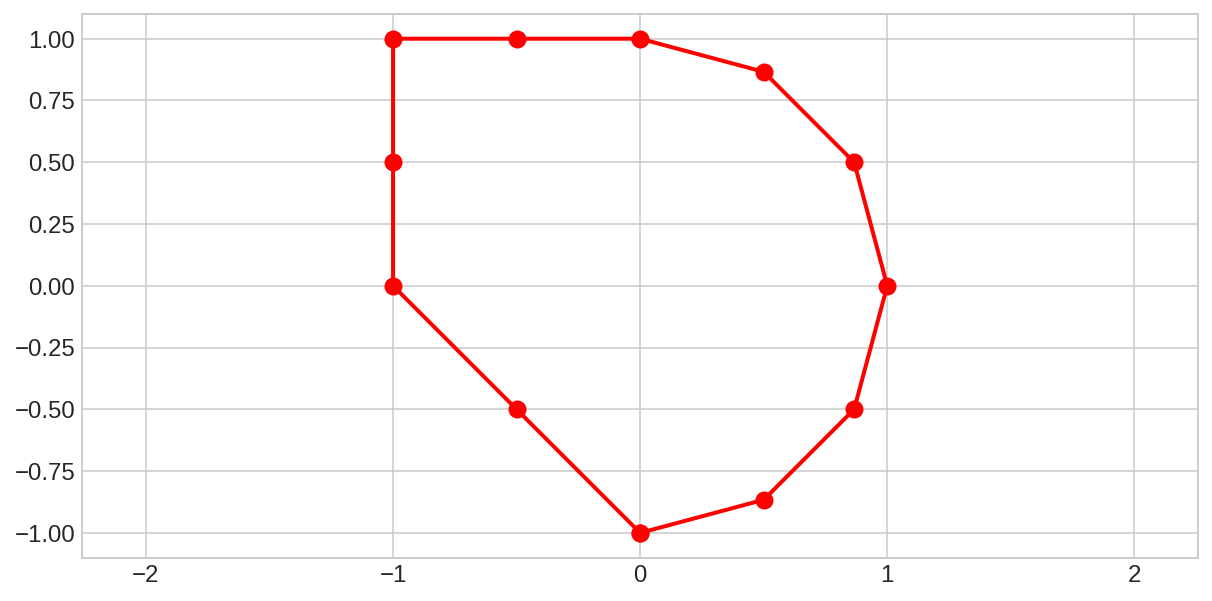

In [6]:
plt.plot(shape1[0], shape1[1], '-or')
plt.axis('equal');

## Rotation matrix centered at (0,0)

R=
$
\begin{bmatrix}
cos(θ) & -sin(θ) \\
sin(θ) & cos(θ)  \\
\end{bmatrix}
$

### Properties

* Performs a rotation with center (0,0) and angle θ
* Determinant = 1
* orthogonal matrix $\rightarrow$ no shape deformation or enlargement (orthogonal automorphism)

[[ 0.707 -0.707]
 [ 0.707  0.707]]


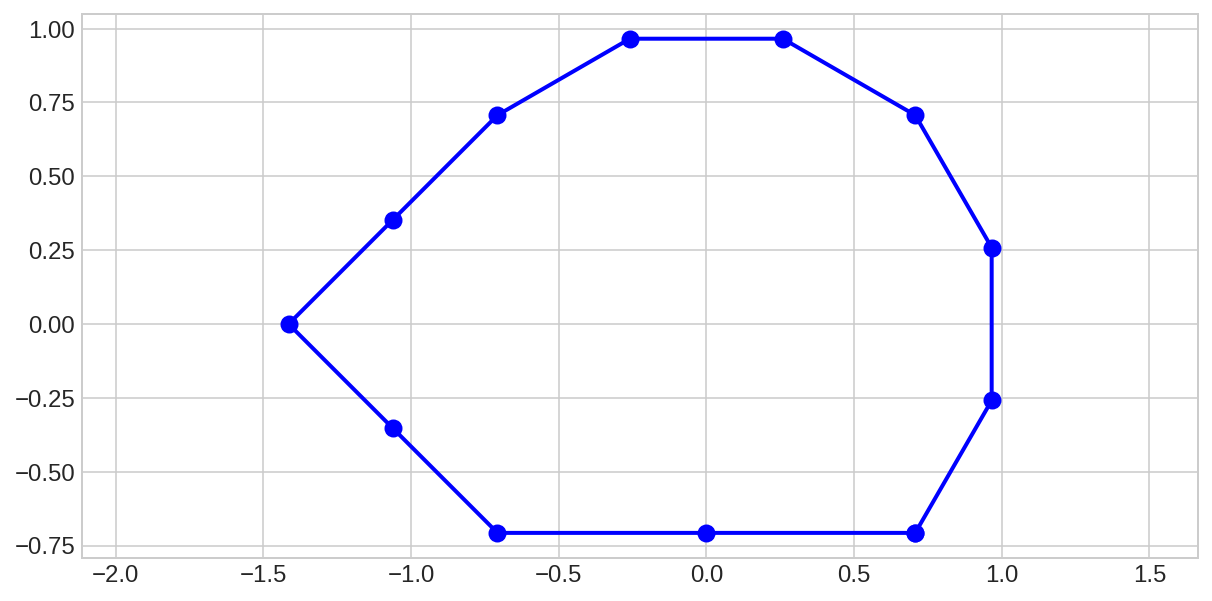

In [4]:
θ = np.pi / 4

R = np.array([[np.cos(θ), -np.sin(θ)], [np.sin(θ), np.cos(θ)]])
print(R)

shape2 = R @ shape1

plt.plot(shape2[0], shape2[1], '-ob')
plt.axis('equal');

np.save("mouse.npy", shape2) # pour le prochain cours

Orthogonal matrix so (by definition) $R.R^T = \textrm{Id}$

In [5]:
R @ R.T

array([[1., 0.],
       [0., 1.]])

So the transpose is the rotation of angle -θ which is logical since sine is an odd function.

## Axial Symmetry

The horizontal symmetry, which transforms (a,b) into (a,-b), is

Sx =
$
\begin{bmatrix}
1 & 0 \\
0 & -1  \\
\end{bmatrix}
$

We therefore see that to have an axial symmetry with respect to a straight line which passes through (0,0) it suffices to

* rotate to put the axis of symmetry horizontal
* apply horizontal symmetry
* do the reverse rotation

Thus the axial symmetry with respect to the straight line which passes through (0,0) and which has an angle of alpha is:

$S = R_{-α}^{-1}\; Sx\; R_{-α} = R_α\;Sx\; R_{-α}$

Note that the order of the matrices is the reverse since we apply the points **x** to the right of $S$.

[[-0.766  0.643]
 [ 0.643  0.766]]


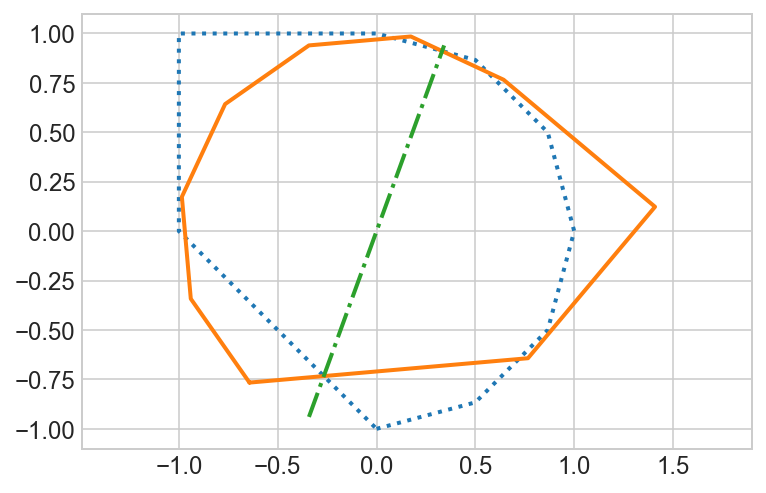

In [6]:
def Rα(α):
    return np.array([[np.cos(α), -np.sin(α)], [np.sin(α), np.cos(α)]])

Sx = np.array([[1, 0],[0,-1]])

θ = 70 * (2 * np.pi)/360  # 70 degrés

shape2 = Rα(θ) @ Sx @ Rα(-θ) @ shape1

print(Rα(θ) @ Sx @ Rα(-θ))

plt.plot(shape1[0], shape1[1], ":")
plt.plot(shape2[0], shape2[1])
plt.plot([-np.cos(θ),np.cos(θ)],[-np.sin(θ),np.sin(θ)],"-.")  # axe de symétrie
plt.axis('equal');

In [7]:
θ = np.pi / 4
Rα(θ) @ Sx @ Rα(-θ)

array([[ 0.,  1.],
       [ 1., -0.]])

I don't know if there is a simpler direct formula to have the axial symmetry with respect to any line that passes through (0,0).

## Translation

We cannot express the translation with a matrix product because it is not a linear map:

$T(2\;\textbf{x}) \ne 2\; T(\textbf{x})$

It is also not an isometric transformation because the distance from a point to (0,0) changes after a translation.

From a vector point of view a translation is an addition:

$T(\textbf{x}) = \textbf{x} + \textbf{v}_t$

There is a trick to express the translations in the form of a matrix product: we change the representation of the points:

$\textbf{x} = (x_1, x_2)$ becomes $\textbf{x} = (x_1, x_2, 1)$

Thus the translation by the vector $(v_1, v_2)$ is

$T(X) = 
\begin{bmatrix}
1 & 0 & v_1\\
0 & 1 & v_2 \\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
1 \\
\end{bmatrix}
$

We can verify that $T$ is indeed a linear application since $T(2\;\textbf{x}) = 2\; T(\textbf{x})$ but on arrival
the new point does not follow the $(x_1, x_2, 1)$ convention.

Translate matrix:
 [[1. 0. 1.]
 [0. 1. 2.]
 [0. 0. 1.]]
Shape1 3d:
 [[ 0.     0.5    0.866  1.     0.866  0.5    0.    -0.5   -1.    -1.    -1.    -0.5    0.   ]
 [-1.    -0.866 -0.5    0.     0.5    0.866  1.     1.     1.     0.5    0.    -0.5   -1.   ]
 [ 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.   ]]


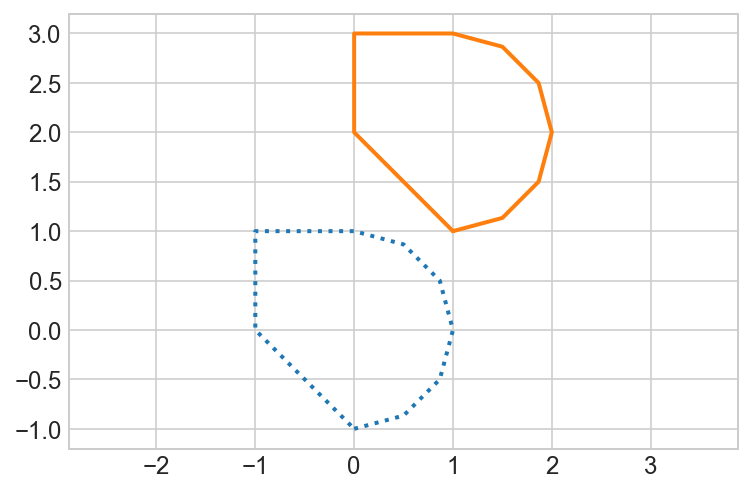

In [8]:
v = np.array([1,2])

T = np.identity(3)
T[0:2,2] = v
print("Translate matrix:\n", T)

shape1_3d = np.concatenate([shape1, np.ones((1, len(shape1[0])))], axis=0)
print("Shape1 3d:\n", shape1_3d)

shape2 = T @ shape1_3d

plt.plot(shape1[0], shape1[1], ":")
plt.plot(shape2[0], shape2[1])
plt.axis('equal');

The inverse matrix of our translation matrix is ​​the one that puts the orange shape back in its original place, so that applies the $-\textbf{v} = (-1,-2)$ transaction.

$T^{-1} = 
\begin{bmatrix}
1 & 0 & -1\\
0 & 1 & -2 \\
0 & 0 & 1 \\
\end{bmatrix}
$

which is not the transpose of T so T is not orthogonal.

The catch is that there are 2 types of isometries:

* vector isometry or orthogonal automorphism which requires that $\forall\, \textbf{x}, \;||\textbf{f}(\textbf{x})|| = ||\textbf{x}||$ as well as the conservation of angles
* the geometric isometry that wants $\forall\, \textbf{a}, \textbf{b}, \; ||\textbf{f}(\textbf{a}) - \textbf{f}(\textbf{b})|| = ||\textbf{a} - \textbf{b}||$.

The translation is indeed a geometric isometry but not vectorial hence the fact that we prefer to speak
orthogonal automorphism rather than isometry to avoid confusion.

## Exercise 1.1

Write in the form of a matrix product the axial symmetry with respect to an axis which does not pass through (0,0).
We will take the axis which passes through (2,0) and which has an angle of π/3 with respect to the horizontal.

Is it an orthogonal automorphism? Show it.